In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [105]:
in_path = "/Users/Paul/research/files/analysis/csvs/multistep_cifar10.csv"
dfmstep = pd.read_csv(in_path)
dfmstep["sched"] = "MultiStep"
in_path = "/Users/Paul/research/files/analysis/csvs/cifar10_paper_sweep.csv"
dfpaper = pd.read_csv(in_path)
dfpaper["sched"] = "Cosine"
# dfpaper = dfpaper[dfpaper.name.str.contains("devries")]
# df = pd.concat([dfmstep, dfpaper])
df = dfpaper

In [106]:
print(len(df))
df = df.dropna(subset=["name", "model"])
print(len(df))

20347
20346


In [107]:
df.groupby("study").count()

,Unnamed: 0,name,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov,risk@75cov,test_risk,test_cov,diff_risk,diff_cov,rstar,val_theta,sched
study,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
iid_study,1605,1605,1605,364,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605,1605
new_class_study_cifar100_original_mode,1319,1319,1319,331,1319,1319,1319,1319,0,0,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
new_class_study_cifar100_proposed_mode,1308,1308,1308,331,1308,1308,1308,1308,0,0,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308
new_class_study_svhn_original_mode,1319,1319,1319,331,1319,1319,1319,1319,0,0,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
new_class_study_svhn_proposed_mode,1319,1319,1319,331,1319,1319,1319,1319,0,0,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
new_class_study_tinyimagenet_original_mode,1319,1319,1319,331,1319,1319,1319,1319,0,0,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
new_class_study_tinyimagenet_proposed_mode,1319,1319,1319,331,1319,1319,1319,1319,0,0,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
new_class_study_tinyimagenet_resize_original_mode,1319,1319,1319,331,1319,1319,1319,1319,0,0,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319
new_class_study_tinyimagenet_resize_proposed_mode,1319,1319,1319,331,1319,1319,1319,1319,0,0,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319,1319


In [108]:
df_clean = df.drop_duplicates(subset=["name", "study", "model", "network", "confid", "sched"], keep="last")

In [109]:
len(df_clean)

19455

In [110]:
df_clean.groupby("name").count()


,Unnamed: 0,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov,risk@75cov,test_risk,test_cov,diff_risk,diff_cov,rstar,val_theta,sched
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
confidnet_bbresnet50_do0_run1_rew2.2,45,45,45,45,45,45,45,45,21,21,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
confidnet_bbresnet50_do0_run2_rew2.2,45,45,45,45,45,45,45,45,21,21,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
confidnet_bbresnet50_do0_run3_rew2.2,45,45,45,45,45,45,45,45,21,21,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
confidnet_bbresnet50_do1_run1_rew2.2,165,165,165,165,165,165,165,165,77,77,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
confidnet_bbresnet50_do1_run2_rew2.2,165,165,165,165,165,165,165,165,77,77,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
confidnet_bbresnet50_do1_run3_rew2.2,165,165,165,165,165,165,165,165,77,77,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
confidnet_bbvgg13_do0_run1_rew2.2,45,45,45,45,45,45,45,45,21,21,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
confidnet_bbvgg13_do0_run2_rew2.2,45,45,45,45,45,45,45,45,21,21,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
confidnet_bbvgg13_do0_run3_rew2.2,45,45,45,45,45,45,45,45,21,21,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45


In [111]:

df = df_clean

In [112]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df[(df.study == "iid_study") & ~(df.name.str.contains("det"))][["name", "confid", "accuracy", "failauc", "failap_err", "aurc"]].sort_values(by="aurc", ascending=True)

<ipython-input-112-36b5d462abf3>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,name,confid,accuracy,failauc,failap_err,aurc
16607,dg_bbvgg13_do0_run4_rew10,det_pe,0.94844,0.94850,0.48275,4.29623
16682,dg_bbvgg13_do0_run3_rew10,det_pe,0.95144,0.94051,0.42427,4.37067
9179,dg_bbvgg16_do0_run4_rew3,det_pe,0.95122,0.94473,0.46494,4.39690
16606,dg_bbvgg13_do0_run4_rew10,det_mcp,0.94844,0.94869,0.48240,4.42886
12488,dg_bbvgg13_do0_run3_rew20,det_pe,0.95011,0.94294,0.43964,4.47862
9042,confidnet_bbvgg13_do0_run5_rew2.2,tcp,0.95022,0.94264,0.44931,4.50795
9180,dg_bbvgg16_do0_run4_rew3,dg,0.95122,0.94293,0.44494,4.51821
9458,dg_bbvgg13_do0_run5_rew6,det_pe,0.95311,0.93736,0.41805,4.54844
9636,confidnet_bbvgg16_do0_run5_rew2.2,tcp,0.95222,0.93702,0.42419,4.54875
9131,dg_bbvgg16_do0_run5_rew3,det_pe,0.95100,0.94172,0.45254,4.54943


In [113]:
##  observations:
##  iid: cosine > multilr. norm equal. vgg16_do_false: good accuracy, horrible auc/aurc. if vgg16, then with do.


In [114]:
meanprops = dict(linestyle='-', linewidth=1, color='k', alpha=0.5)
whiskerprops=dict(linestyle='-', linewidth=0)

In [115]:
df["backbone"] = df.apply(lambda row: row["name"].split("bb")[1].split("_")[0], axis=1)
df["dropout"] = df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
df["model"] = df.apply(lambda row: row["name"].split("_")[0], axis=1)

['confidnet_bbvgg13_do0_run2_rew2.2', 'confidnet_bbvgg13_do0_run1_rew2.2', 'confidnet_bbvgg13_do0_run3_rew2.2', 'confidnet_bbvgg16_do0_run2_rew2.2', 'confidnet_bbvgg16_do0_run1_rew2.2', 'confidnet_bbvgg16_do0_run3_rew2.2', 'confidnet_bbresnet50_do0_run1_rew2.2', 'confidnet_bbresnet50_do0_run2_rew2.2', 'confidnet_bbresnet50_do0_run3_rew2.2', 'confidnet_bbvgg13_do1_run1_rew2.2', 'confidnet_bbvgg13_do1_run1_rew2.2', 'confidnet_bbvgg13_do1_run1_rew2.2', 'confidnet_bbvgg13_do1_run2_rew2.2', 'confidnet_bbvgg13_do1_run2_rew2.2', 'confidnet_bbvgg13_do1_run2_rew2.2', 'confidnet_bbvgg13_do1_run3_rew2.2', 'confidnet_bbvgg13_do1_run3_rew2.2', 'confidnet_bbvgg13_do1_run3_rew2.2', 'confidnet_bbvgg16_do1_run1_rew2.2', 'confidnet_bbvgg16_do1_run1_rew2.2', 'confidnet_bbvgg16_do1_run1_rew2.2', 'confidnet_bbresnet50_do1_run1_rew2.2', 'confidnet_bbresnet50_do1_run1_rew2.2', 'confidnet_bbresnet50_do1_run1_rew2.2', 'confidnet_bbvgg16_do1_run3_rew2.2', 'confidnet_bbvgg16_do1_run3_rew2.2', 'confidnet_bbvgg16_

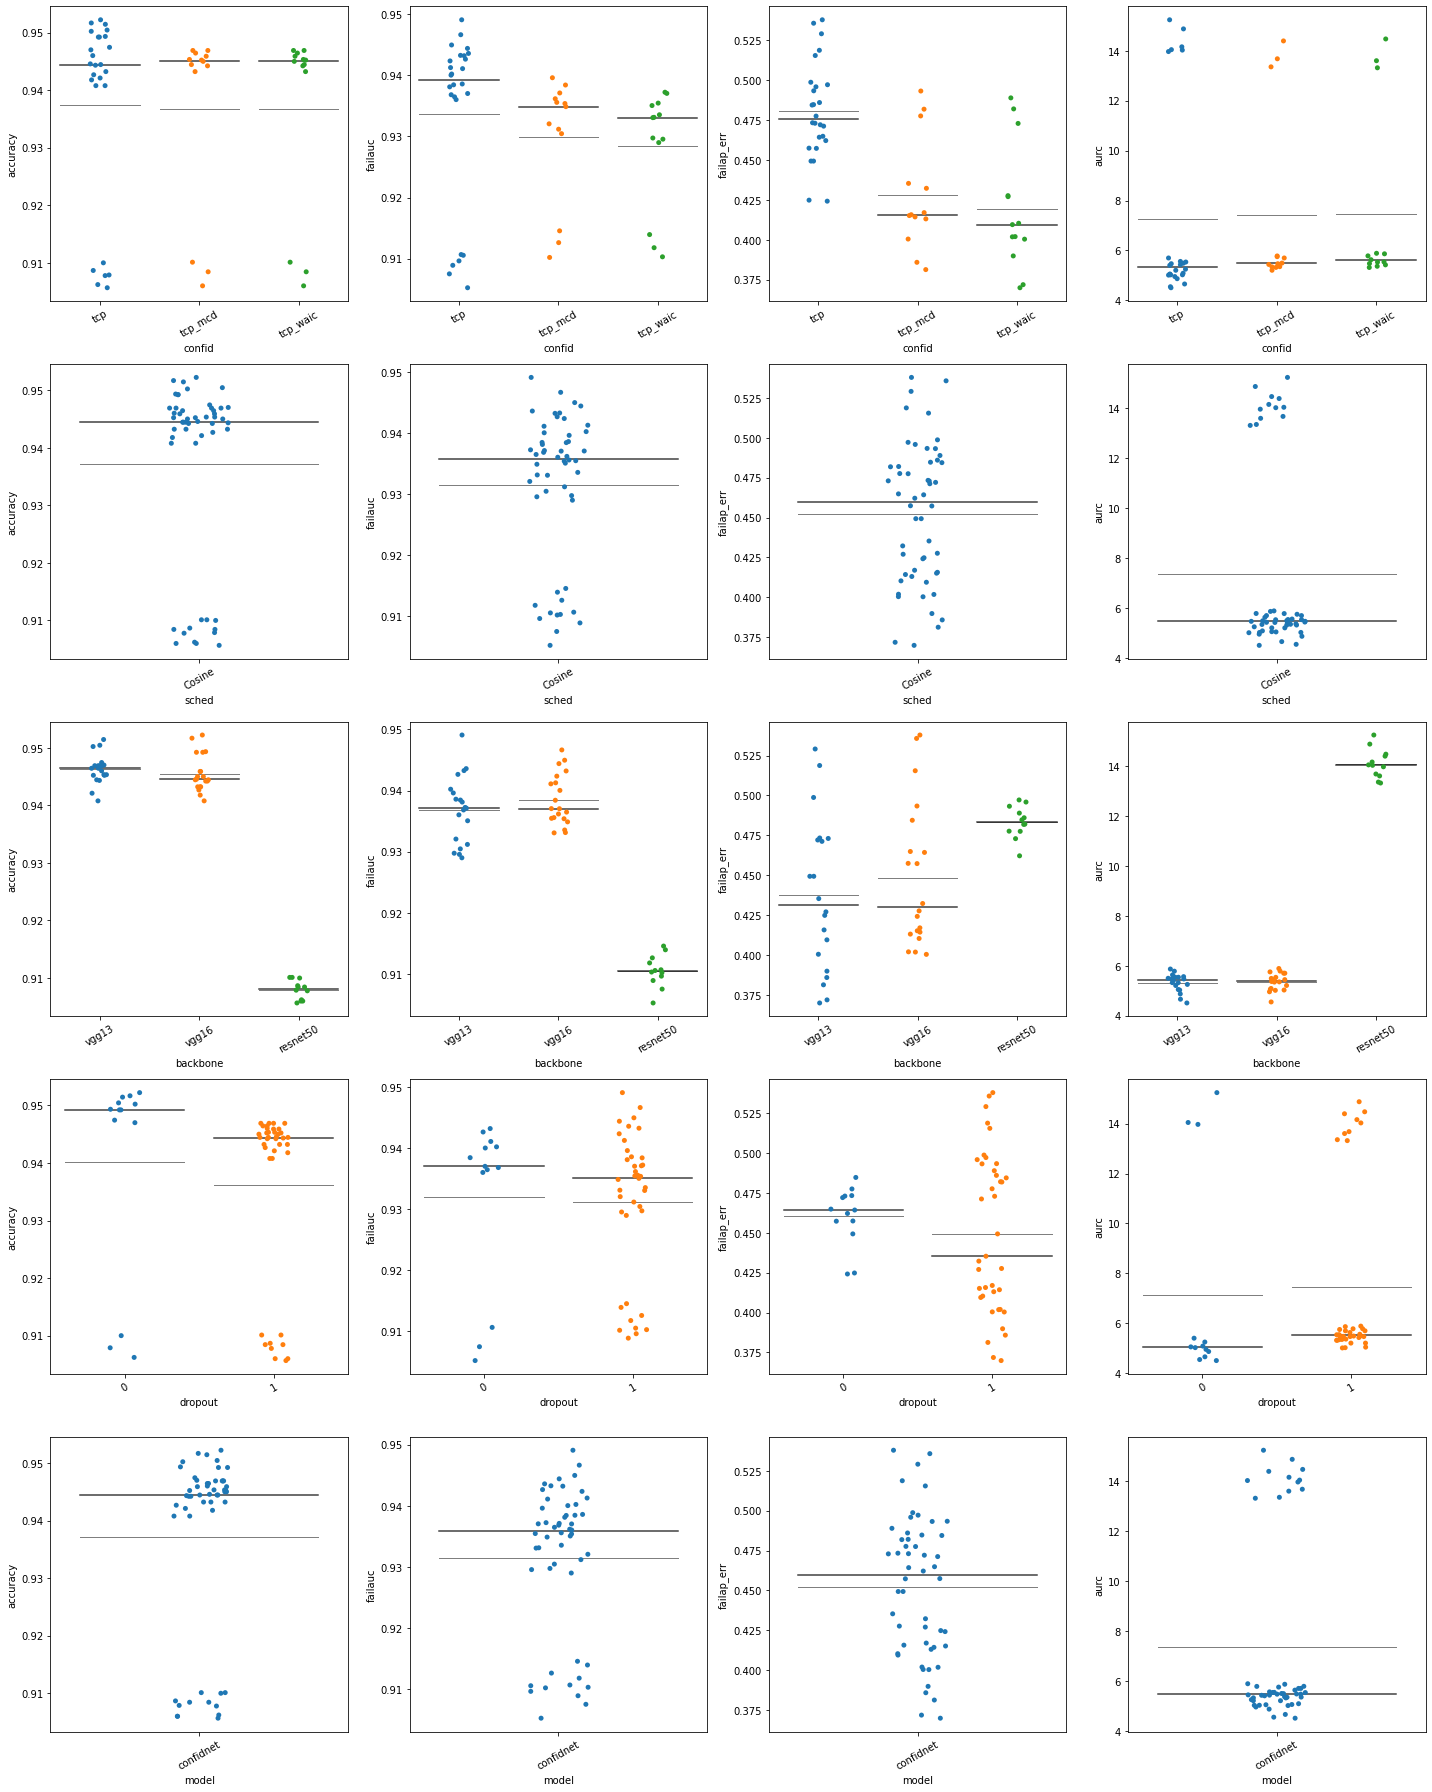

In [118]:

data =  df[(df.study == "iid_study") & (df.confid.str.contains("tcp"))]
# data =  df[(df.study == "new_class_study_tinyimagenet_resize_original_mode")]
#data =  df[(df.study == "iid_study")  & (df.backbone == "vgg16") ]
print(data.name.tolist())
dims = ["confid","sched", "backbone", "dropout", "model"]
metrics = ["accuracy", "failauc", "failap_err", "aurc"]
scale = 5
f, axs = plt.subplots(nrows=len(dims), ncols=len(metrics), figsize=(len(metrics)*scale, len(dims)*scale))
for xix, dim in enumerate(dims):
    for yix, metric in enumerate(metrics):
        y = metric
        sns.stripplot(ax=axs[xix, yix], x=dim, y=metric, data=data)
        sns.boxplot(ax=axs[xix, yix], x=dim, y=metric, data=data, saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
        axs[xix, yix].set_xticklabels(axs[xix, yix].get_xticklabels(),rotation=30)

plt.tight_layout()

In [ ]:
data[["name", "confid", "failauc", "failap_err", "aurc", "failap_suc", "accuracy"]].sort_values(by="aurc", ascending=True)

In [ ]:
data["aurc_iid_rank"] = data.d TODO RANK!!

In [ ]:
df[(df.study == "new_class_study_tinyimagenet_resize_original_mode")  & (df.confid=="devries")].name
# devries_sweep|ultimate_cifar_fix_sweep/devries|200fixed